In [2]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import random 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
path_dir = "C:\\Users\\slpri\\OneDrive\\Desktop\\CAPSTONE PROJECT\\dataset\\Training"
Categories = ["glioma","meningioma","notumor","pituitary"]

In [4]:
data = []
def create_data():
    for categories in Categories:
        path = os.path.join(path_dir , categories)
        class_name = categories
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (100,100))
                data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()

In [5]:
random.shuffle(data)

In [6]:
x_data = []
y_data = []
for features,labels in data:
    x_data.append(features)
    y_data.append(labels)

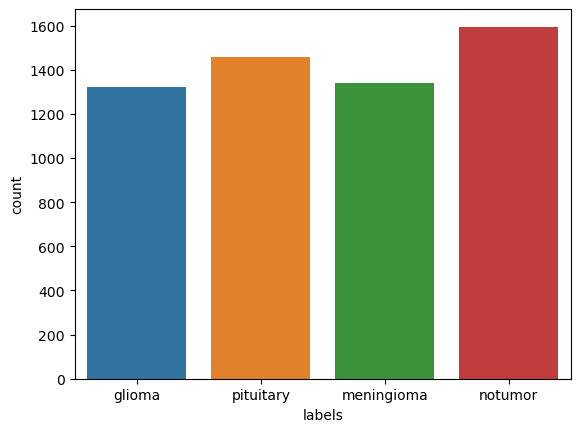

In [8]:
import seaborn as sns

# Assuming df is your DataFrame containing the "labels" column
sns.countplot(data=df, x="labels")
df["labels"] = df["labels"].astype("category")

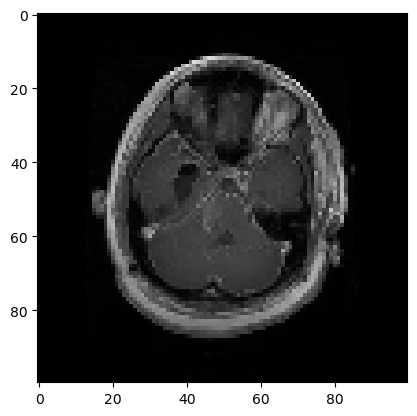

In [9]:
x_data = np.array(x_data)
le = LabelEncoder()
y_data = le.fit_transform(y_data)
plt.imshow(x_data[300])

In [10]:
test_data = []
def create_data():
    for categories in Categories:
        path = os.path.join("C:\\Users\\slpri\\OneDrive\\Desktop\\CAPSTONE PROJECT\\dataset\\Testing" , categories)
        class_name = categories
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img))
                new_array = cv.resize(img_array , (100,100))
                test_data.append([new_array , class_name])
            except Exception as e:
                pass
create_data()
test_data[0]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'glioma']

In [11]:
random.shuffle(test_data)

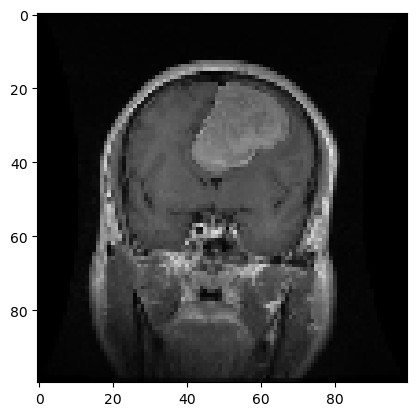

In [12]:
x_test = []
y_test = []
for features,labels in test_data:
    x_test.append(features)
    y_test.append(labels)
x_test = np.array(x_test)
plt.imshow(x_test[3])

In [13]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)
x_data.shape

(5712, 100, 100, 3)

In [14]:
x_test.shape

(1311, 100, 100, 3)

In [15]:
model = Sequential()
resnet = tf.keras.applications.resnet50.ResNet50(include_top=False,
                                       weights=None,
                                       input_shape=(100,100,3),
                                       classes=4)
model.add(resnet)
model.add(Flatten())
model.add(Dense(122,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [16]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [17]:
history = model.fit(x_data,y_data,validation_data=(x_test,y_test),epochs=20,batch_size=100)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 317s 5s/step - accuracy: 0.3174 - loss: 6.3989 - val_accuracy: 0.3097 - val_loss: 20355.7129
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 333s 6s/step - accuracy: 0.4904 - loss: 1.2391 - val_accuracy: 0.4630 - val_loss: 1.2031
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.7281 - loss: 0.8496 - val_accuracy: 0.3211 - val_loss: 43787.0156
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 309s 5s/step - accuracy: 0.7850 - loss: 0.7643 - val_accuracy: 0.3280 - val_loss: 5.4807
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 377s 7s/step - accuracy: 0.7911 - loss: 0.9156 - val_accuracy: 0.4653 - val_loss: 3.2733
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 494s 9s/step - accuracy: 0.8327 - loss: 0.4468 - val_accuracy: 0.4310 - val_loss: 1.8254
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 517s 9s/step - accuracy: 0.8424 - loss: 0.4380 - val_accuracy: 0.6194 - val_loss: 0.9746
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 541s 9s/step - accuracy: 0.9075 - loss: 0.2657 - val_accuracy: 0.

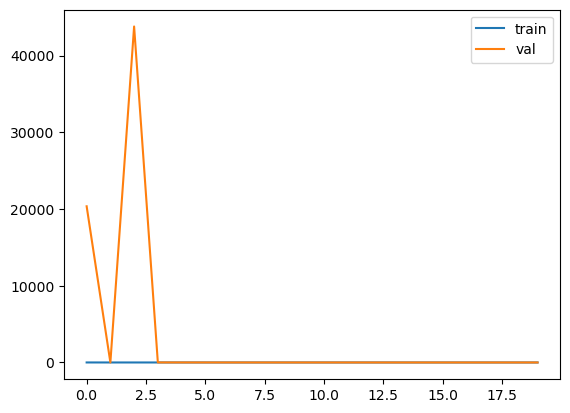

In [18]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train","val"])

41/41 ━━━━━━━━━━━━━━━━━━━━ 29s 697ms/step


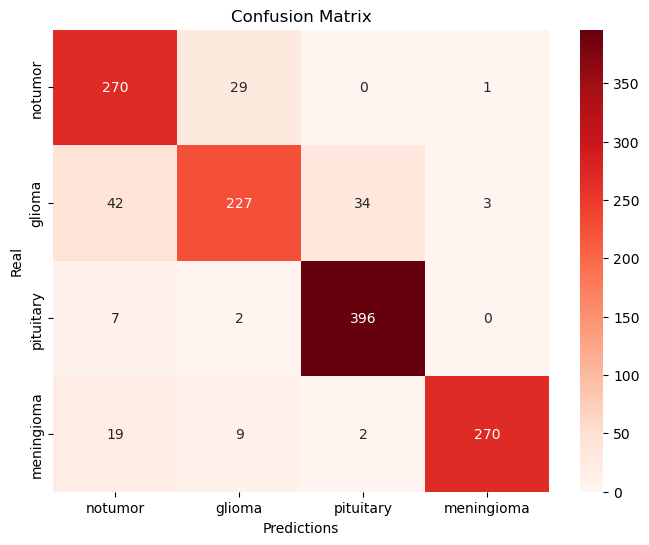

In [23]:
pred = model.predict(x_test)
classPred = np.argmax(pred, axis=1)

# Check the shape of y_test
if len(y_test.shape) > 1:
    classLabel = np.argmax(y_test, axis=1)
else:
    classLabel = y_test  # Assuming y_test is already in the correct format

con_matrix = confusion_matrix(classLabel, classPred)

plt.figure(figsize=(8, 6))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['notumor', 'glioma', 'pituitary', 'meningioma'], 
            yticklabels=['notumor', 'glioma', 'pituitary', 'meningioma'])

plt.xlabel('Predictions')
plt.ylabel('Real')
plt.title('Confusion Matrix')
plt.show()


In [25]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense
import tensorflow as tf

mobileModel = keras.applications.MobileNet(input_shape=(224,224,3), include_top=False)
newModel = Sequential()
newModel.add(mobileModel)
newModel.add(Flatten())
newModel.add(Dropout(0.5))
newModel.add(Dense(4, activation="softmax"))

newModel.compile(loss="binary_crossentropy", optimizer="adam", metrics=[
    'accuracy',
    tf.keras.metrics.AUC(),
    tf.keras.metrics.Recall(),
    tf.keras.metrics.Precision(),
    tf.keras.metrics.F1Score()])

newModel.summary()


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

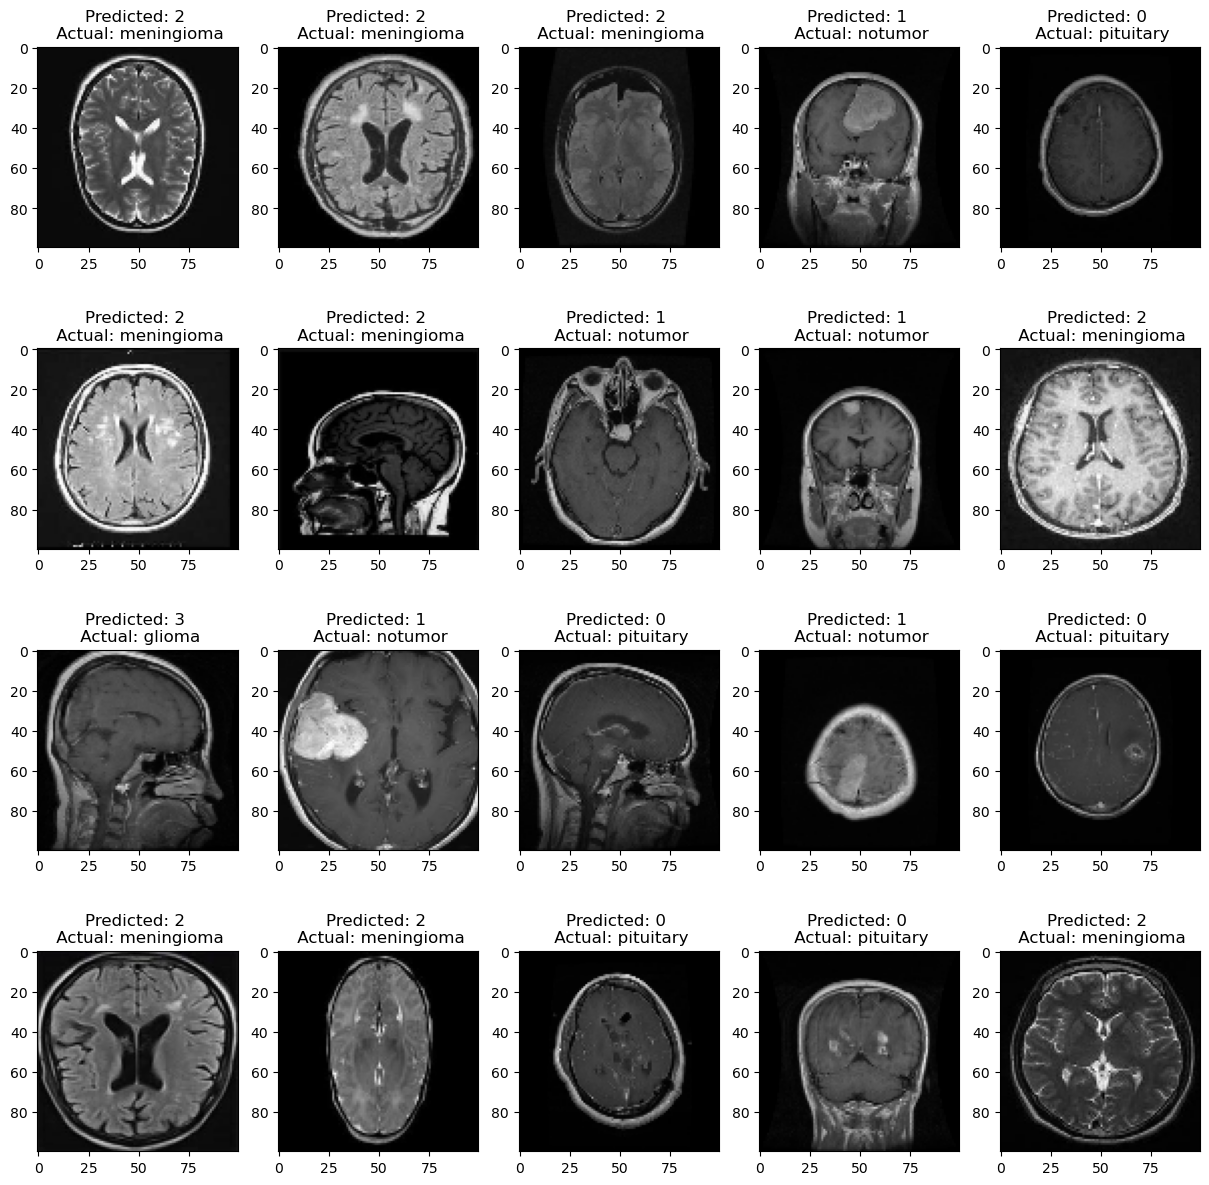

In [31]:
os.chdir("C:\\Users\\slpri\\OneDrive\\Desktop\\CAPSTONE PROJECT\\dataset\\Testing")
dict_out = {}
test_sub_dirs = os.listdir()[::-1]
for i in range(len(test_sub_dirs)):
    dict_out.update({test_sub_dirs[i]: i})
    

actual_classes = [list(dict_out.keys())[list(dict_out.values()).index(val)] for val in classLabel]

fig, axes = plt.subplots(4, 5, figsize=(15, 15))

for i in range(20):
    axes[i//5, i%5].imshow(x_test[i])
    axes[i//5, i%5].set_title(f"Predicted: {classLabel[i]} \n Actual: {actual_classes[i]}")
plt.show()